In [32]:
import matplotlib.pyplot as plt

%run helperfx.py
%run extractlicks_singlebottle.ipynb

In [48]:
rats = [key for key in day4_data.keys()]
rat = rats[2]

In [49]:
lickdata = lickCalc(day4_data[rat], burstThreshold = 0.5)

In [50]:
lickdata.keys()

dict_keys(['licklength', 'longlicks', 'licks', 'ilis', 'shilis', 'freq', 'total', 'bStart', 'bInd', 'bEnd', 'bLicks', 'bTime', 'bNum', 'bMean', 'bMean-first3', 'bILIs', 'rStart', 'rInd', 'rEnd', 'rLicks', 'rTime', 'rNum', 'rILIs', 'hist'])

In [51]:
lickdata['bLicks']

array([  4,  35,  26,  16,  16,  19,  17,  14,  15,  30,  29,  50,  17,
        57,  11,   2,  62,  55,   7,  17,  45,  69,  10,  21,  63,  82,
        33,  19,  39,  15,  10,  53,  72,   8, 144,  52, 220,  30,  34,
        19, 310,  36,  25,  50,  48,  24,  34, 103,  42,  72,  43,  70,
         3,   1,  58,  74,  13,  60,  24,   2])

In [52]:
histbins = np.arange(1,500)

burstdata = {}
burstdata['hist'] = np.histogram(lickdata['bLicks'], bins=histbins)

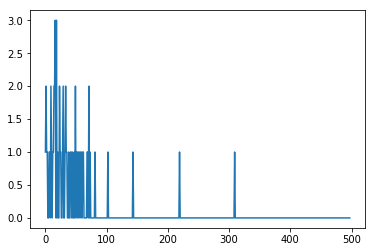

In [53]:
plt.plot(burstdata['hist'][0])

In [58]:
def calculate_lick_prob(bursthist):

    x = []
    y = []
    for i, b in enumerate(bursthist):
        if b > 0:
            x.append(i)
            y.append(b/sum(bursthist[i+1:]))

    y = [1-y for y in y]
    
    return [x, y]

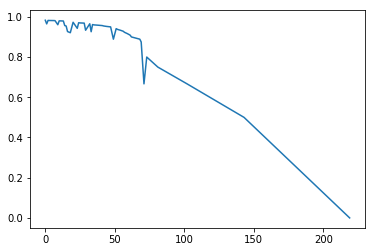

In [59]:
y
plt.plot(x,y)

In [61]:
histbins = np.arange(1,500)

lickprob = {}

for rat in rats:
    lickdata = lickCalc(day4_data[rat], burstThreshold = 0.5)

    burstdata = {}
    burstdata['hist'] = np.histogram(lickdata['bLicks'], bins=histbins)
    
    lickprob[rat] = calculate_lick_prob(burstdata['hist'][0])
    

C:\ProgramData\Anaconda3\envs\lickmodel\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in longlong_scalars
  


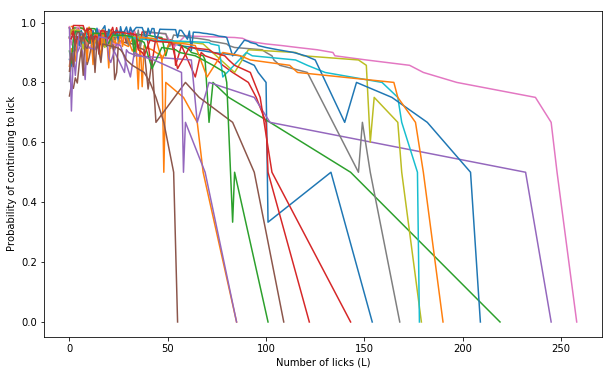

In [208]:
f, ax = plt.subplots(figsize=(10, 6))
for rat in rats:
    data = lickprob[rat]
    ax.plot(data[0], data[1])
    
ax.set_ylabel('Probability of continuing to lick')
ax.set_xlabel('Number of licks (L)')
savefolder = 'C:\\Users\\James Rig\\Dropbox\\AbstractsAndTalks\\2019-06-12_MOAB Lick microstructure\\figs\\'
f.savefig(savefolder+'milkrats.png')

In [187]:
data = lickprob[rats[8]]

x = np.linspace(0, max(data[0]), 1000)

newdata = np.interp(x, data[0], data[1])
idx = np.isfinite(newdata)

x = x[idx]
y = newdata[idx]

quadfit = np.polyfit(x, y, 2)
cubfit = np.polyfit(x, y, 3)

half_x = int(len(x)*.75)
reduced_x = x[:half_x]
reduced_y = y[:half_x]


In [188]:
aaa

Polynomial([ 0.65524383, -0.51352778, -0.15440551], domain=[  0.        , 218.99099099], window=[-1.,  1.])

In [189]:
len(reduced_x)

404

array([-6.60199509e-04,  9.62385774e-01])

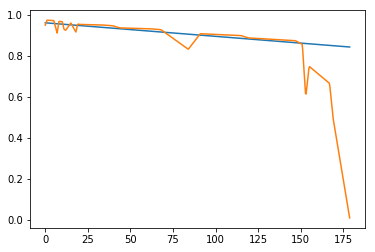

In [191]:


polyfit = np.polyfit(reduced_x, reduced_y, 1)

f, ax = plt.subplots()

ax.plot(x, polyfit[0]*x + polyfit[1])
ax.plot(x, y)

polyfit

In [194]:
coef = {}

for rat in rats:
    data = lickprob[rat]

    x = np.linspace(0, max(data[0]), 1000)

    newdata = np.interp(x, data[0], data[1])
    idx = np.isfinite(newdata)

    x = x[idx]
    y = newdata[idx]
    
    half_x = int(len(x)*.75)
    reduced_x = x[:half_x]
    reduced_y = y[:half_x]
    
    coef[rat]=np.polyfit(reduced_x, reduced_y, 1)
    
    
    

{'IPP2.1': array([-0.00394349,  1.07602711]),
 'IPP2.2': array([-0.00446397,  1.02869678]),
 'IPP2.3': array([-0.003992 ,  1.0727995]),
 'IPP2.4': array([-0.00189542,  1.00161712]),
 'IPP2.5': array([-0.00234142,  0.95561634]),
 'IPP2.6': array([-0.0029035 ,  0.93552031]),
 'IPP2.7': array([-6.80479497e-04,  9.80411099e-01]),
 'IPP2.8': array([-8.10656268e-04,  9.69963561e-01]),
 'IPP2.9': array([-6.60199509e-04,  9.62385774e-01]),
 'IPP2.10': array([-0.00097696,  0.97684055]),
 'IPP2.11': array([-0.00134509,  1.01231612]),
 'IPP2.12': array([-9.24309479e-04,  9.54056753e-01]),
 'IPP2.13': array([-0.00132459,  0.96858392]),
 'IPP2.14': array([-0.00275097,  1.02700542]),
 'IPP2.15': array([-0.003239  ,  0.96416276]),
 'IPP2.16': array([-0.00257589,  0.9475275 ])}

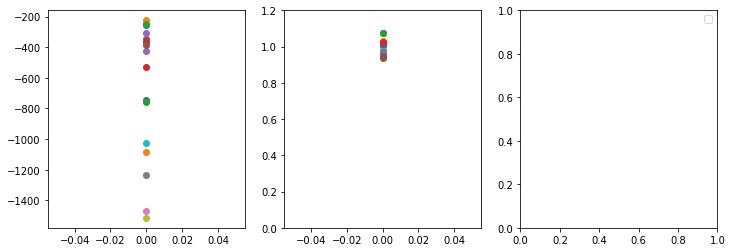

In [204]:
f, ax = plt.subplots(figsize=(12, 4), ncols=3)
for rat in rats:
    ax[0].plot(1/coef[rat][0], 'o')
    ax[1].plot(coef[rat][1], 'o')

ax[1].set_ylim([0, 1.2])
    
legend = rats
ax[2].legend(legend)

coef

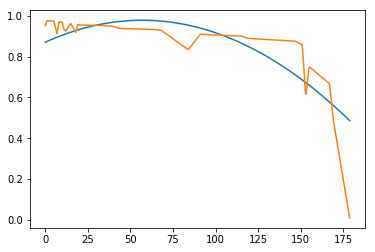

In [169]:
polyfit = np.polyfit(x, y, 2)

f, ax = plt.subplots()

ax.plot(x, polyfit[0]*x**2 + polyfit[1]*x + polyfit[2])
ax.plot(x, y)

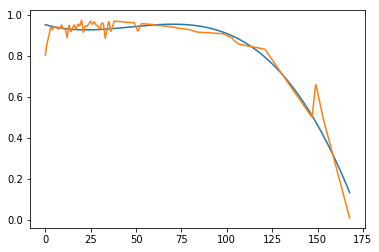

In [166]:
polyfit = np.polyfit(x, y, 3)

f, ax = plt.subplots()

ax.plot(x, polyfit[0]*x**3 + polyfit[1]*x**2 + polyfit[2]*x + polyfit[3])
ax.plot(x, y)

In [134]:
idx = np.isfinite(newdata)
idx

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

100
200
300
400
500
600
700
800
900


(0, 1)

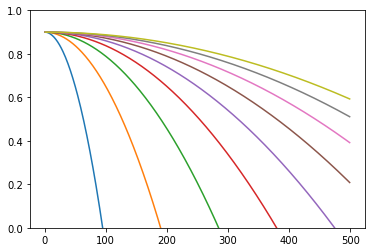

In [111]:
x = histbins

f, ax = plt.subplots()
for alpha in np.arange(100, 1000, 100):
    print(alpha)
    y = -((1/alpha)*x)**2 + 0.9
    ax.plot(x, y)
ax.set_ylim([0, 1])

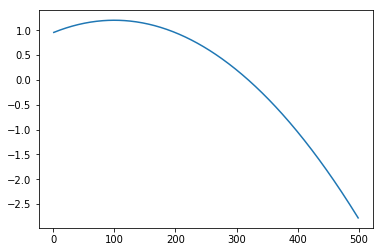

In [92]:
plt.plot(x, y)